In [1]:
import arviz as az
import bambi as bmb
import numpy as np
import pandas as pd

random_seed = 1234

pisa_df = pd.read_csv("https://raw.githubusercontent.com/m-clark/generalized-additive-models/master/data/pisasci2006.csv")

In [2]:
pisa_df.head()

,Country,Overall,Issues,Explain,Evidence,Interest,Support,Income,Health,Edu,HDI
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,0.599,0.886,0.716,0.724
1,Argentina,391.0,395.0,386.0,385.0,567.0,506.0,0.678,0.868,0.786,0.773
2,Australia,527.0,535.0,520.0,531.0,465.0,487.0,0.826,0.965,0.978,0.920
3,Austria,511.0,505.0,516.0,505.0,507.0,515.0,0.835,0.944,0.824,0.866
4,Azerbaijan,382.0,353.0,412.0,344.0,612.0,542.0,0.566,0.780,NaN,NaN


In [3]:
knots_income = np.linspace(np.min(pisa_df['Income']), np.max(pisa_df['Income']), 5+2)[1:-1]
knots_edu = np.linspace(np.min(pisa_df['Edu']), np.max(pisa_df['Edu']), 5+2)[1:-1]
knots_health = np.linspace(np.min(pisa_df['Health']), np.max(pisa_df['Health']), 5+2)[1:-1]
formula_spline = """Overall ~ bs(Income, degree=3, knots=knots_income) + bs(Edu, degree=3, knots=knots_edu) + bs(Health, degree=3, knots=knots_health)"""

In [4]:
spline_model = bmb.Model(formula_spline, pisa_df, dropna=True)
spline_idata = spline_model.fit(random_seed=random_seed, tune=1000, draws=1000, target_accept=0.95)

Automatically removing 13/65 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Overall_sigma, Intercept, bs(Income, degree=3, knots=knots_income), bs(Edu, degree=3, knots=knots_edu), bs(Health, degree=3, knots=knots_health)]
/home/tomas/anaconda3/envs/bambi/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/home/tomas/anaconda3/envs/bambi/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 93 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


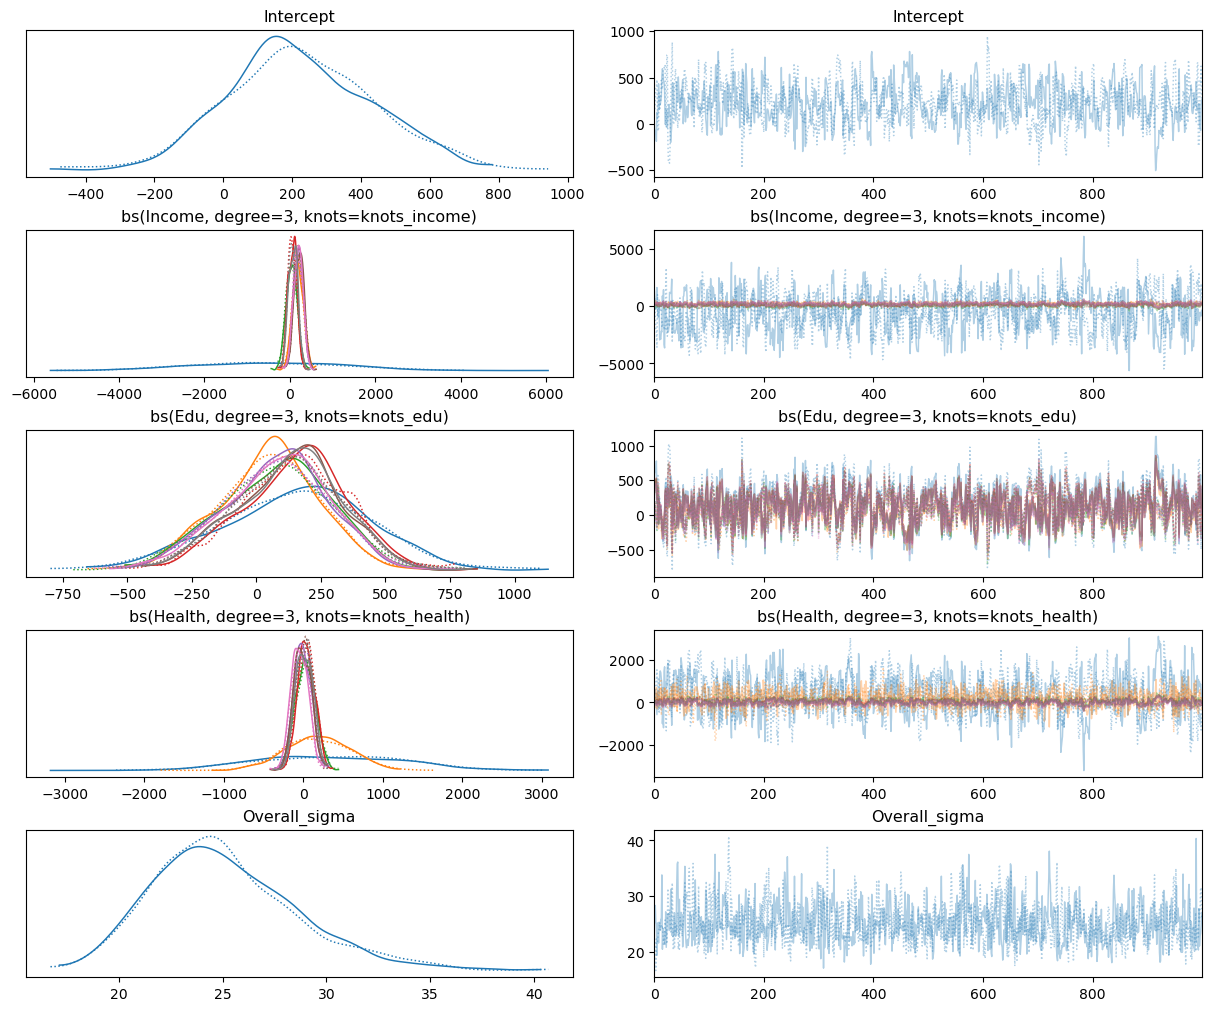

In [5]:
az.plot_trace(spline_idata, backend_kwargs={"layout": "constrained"});

**NOTE** See the traceplots for some spline components. The lines move together. This indicates high correlation. Maybe too many basis functions?

In [6]:
spline_model.predict(spline_idata, kind='pps')

Default computed for conditional variable: Edu
Default computed for unspecified variable: Health, Income


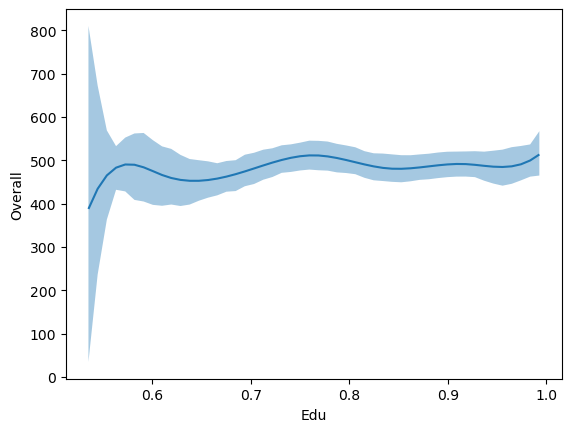

In [7]:
fig, ax = bmb.interpret.plot_predictions(
    spline_model, spline_idata, "Edu"
)

Default computed for unspecified variable: Health, Income


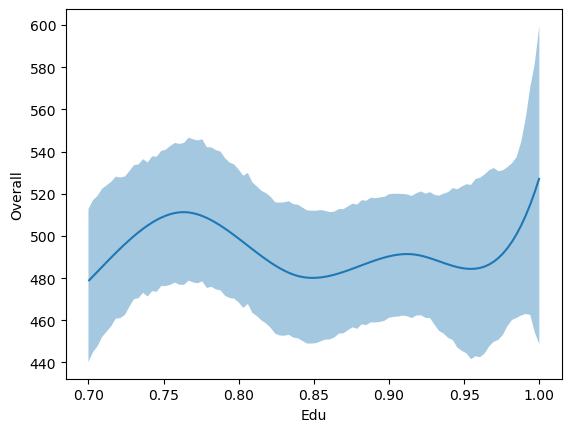

In [8]:
fig, ax = bmb.interpret.plot_predictions(
    spline_model, spline_idata, {"Edu": np.linspace(0.7, 1, num=100)}
)